# E2. SLAM

### Define all the imports
Import all the dependencies required to launch the notebook

In [22]:
# Import main dependencies
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [23]:
# Change to main repo folder for the imports
_, dir = os.path.split(os.getcwd())
if dir == 'notebooks': 
    os.chdir('..')
    sys.path.append(os.getcwd())
# Ignore warnings from pandas
pd.set_option('mode.chained_assignment', None)

In [3]:
# Import methods from our local library
from src.EKF_SLAM.EKF_SLAM_known_correspondences import ExtendedKalmanFilterSLAM as EKF_SLAM

from src.fast_SLAM_1.Fast_SLAM_1_known_correspondences import FastSLAM1 as FastSLAM
from src.fast_SLAM_1.lib import MotionModel as FS_MotionModel
from src.fast_SLAM_1.lib import MeasurementModel as FS_MeasurementModel

from src.graph_SLAM.Graph_SLAM_known_correspondences import GraphSLAM

### Set dataset

In [52]:
# Define dataset to read
dataset = "data/MRCLAM_Dataset4"
robot = 'Robot3' # Robot
start_frame = 2000
end_frame = 2100

### T1. Review EKF SLAM
Review the EKF_SLAM() method, execute the EKF SLAM of the next code block, and answer the questions below:

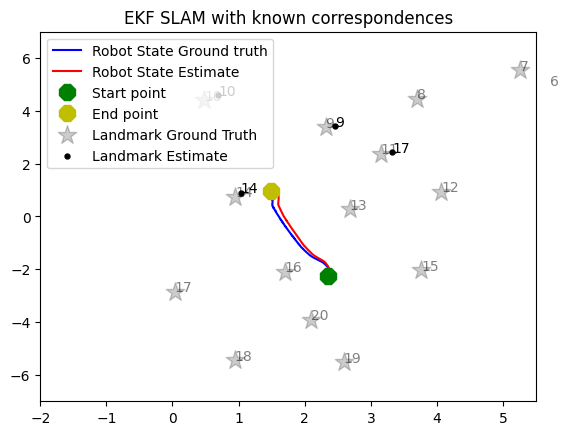

In [15]:
def ekf_slam_fn(dataset, robot, start_frame, end_frame, plot=True, plot_inter=False):
    # DEFAULT PARAMETERS:
    # State covariance matrix
    R = np.diagflat(np.array([5.0, 5.0, 100.0])) ** 2
    # Measurement covariance matrix
    Q = np.diagflat(np.array([300.0, 300.0, 1e16])) ** 2
    ekf_slam = EKF_SLAM(dataset, robot, start_frame, end_frame, R, Q, plot=plot, plot_inter=plot_inter)
    ekf_slam.build_dataframes()
    return ekf_slam
ekf_df = ekf_slam_fn(dataset, robot, start_frame, end_frame, plot=True, plot_inter=False)

**T11** Which type of SLAM problem is solving the EKF SLAM method executed above? Online or full? Why?

(Answer here max 150 words)

**T12** Could you describe what hapens after a loop closure is detected?

(Answer here max 150 words)

**T13** Which are the biggest limitations and advantages of the EKF SLAM? Justify your answer.

(Answer here max 300 words)

### T2. Review FAST SLAM
Review the FastSLAM() method, execute the FAST SLAM of the next code block, and answer the questions below:

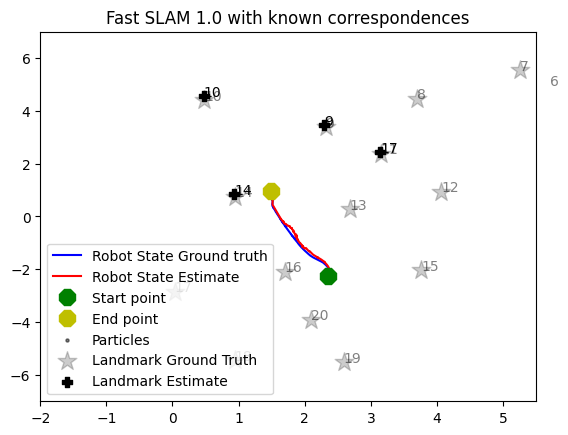

In [19]:
def fast_slam_fn(dataset, robot, start_frame, end_frame, N_particles = 100, plot = True):
    # Initialize Motion Model object
    # Motion noise (in meters / rad)
    # [noise_x, noise_y, noise_theta, noise_v, noise_w]
    # Fisrt three are used for initializing particles
    # Last two are used for motion update
    motion_noise = np.array([0.0, 0.0, 0.0, 0.1, 0.15])
    motion_model = FS_MotionModel(motion_noise)

    # Initialize Measurement Model object
    # Measurement covariance matrix
    Q = np.diagflat(np.array([0.05, 0.02])) ** 2
    measurement_model = FS_MeasurementModel(Q)

    # Initialize SLAM algorithm
    # Number of particles
    N_particles = N_particles

    fast_slam = FastSLAM(motion_model, measurement_model)
    fast_slam.load_data(dataset, robot, start_frame, end_frame)
    fast_slam.initialization(N_particles)

    # Run full Fast SLAM 1.0 algorithm
    for data in fast_slam.data:
        if (data[1] == -1):
            fast_slam.robot_update(data)
        else:
            fast_slam.landmark_update(data)
        fast_slam.state_update()
    if plot:
        fast_slam.plot_data()
        plt.show()
    fast_slam.build_dataframes()
    return fast_slam
fast_df = fast_slam_fn(dataset, robot, start_frame, end_frame)

**T2.1** The Fast SLAM algorithm iteratively executes the functions robot_update(), landmark_update() and state_update(). Could you specify, the objective of each of the functions?

(Answer here max 150 words)

**T2.2** The Fast SLAM algorithm method inputs a measurement_model. Could you describe the model and the purpose of it?

(Answer here max 150 words)

**T2.3** Which is the main assumption of Fast SLAM algorithms?

(Answer here max 150 words)

### T3. Review Graph SLAM
Review the GraphSLAM() method, execute the Graph SLAM of the next code block, and answer the questions below:

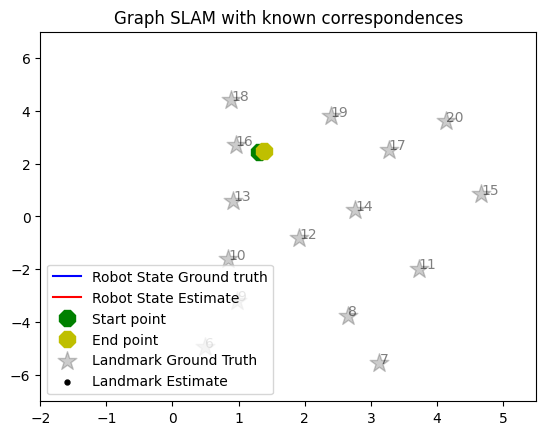

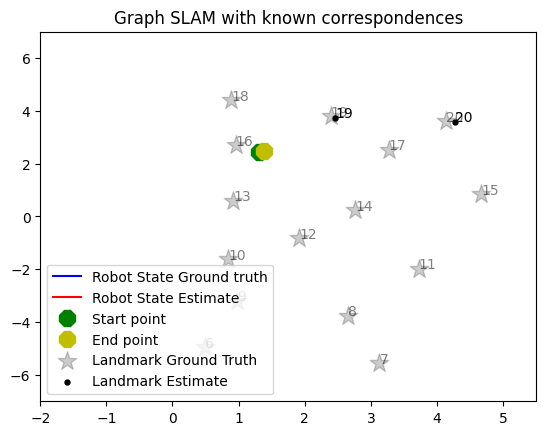

In [53]:
def graph_slam_fn(dataset, robot, start_frame, end_frame, n=4, plot=True):
    # State covariance matrix
    R = np.diagflat(np.array([5, 5, 20])) ** 2
    # Measurement covariance matrix
    Q = np.diagflat(np.array([100.0, 100.0, 1e16])) ** 2
    # Iterations
    n = n
    graph_slam = GraphSLAM(dataset, robot, start_frame, end_frame, n, R, Q, plot=plot)
    if plot:
        plt.show()
    graph_slam.build_dataframes()
    return graph_slam
graph_df = graph_slam_fn(dataset, robot, start_frame, end_frame, plot=True)

In [54]:
joint_df = pd.DataFrame(graph_df.robot_states).join(graph_df.gt, rsuffix = '_gt').dropna()
e_graph_path, e_graph_max, e_graph_end = normalized_path_error_optim(joint_df)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
2009-07-22 21:19:54.555000064	

In [60]:
graph_df.gt

,x,y,theta
stamp,,,
2009-07-22 21:19:54.555000064,1.309627,2.424185,0.8609
2009-07-22 21:19:54.568999936,1.310193,2.425441,0.8592
2009-07-22 21:19:54.600000000,1.311113,2.426593,0.8596
2009-07-22 21:19:54.619000064,1.312368,2.427724,0.8596
2009-07-22 21:19:54.645999872,1.313608,2.428890,0.8558
...,...,...,...
2009-07-22 21:19:56.253999872,1.379485,2.472283,0.2006
2009-07-22 21:19:56.275000064,1.380588,2.473032,0.1929
2009-07-22 21:19:56.288999936,1.381479,2.473638,0.1861


In [46]:
e_graph_path, e_graph_max, e_graph_end

(0.06419552190263796, 0.12682037484661388, 0.09258839511695628)

**T3.1** Which type of SLAM problem is solving the Graph SLAM method executed above? Online or full? Why?

(Answer here max 150 words)

**T3.2** The main functions of the GraphSLAM() implementation executed above are: motion_update(), linearize(), reduce() and solve(). Justify for each function if it is part either from the front-end or the back end.

(Answer here max 150 words)

**T3.3** The GraphSLAM() implementation executed above shows a very poor performance in terms of computation. Please provide a list of suggestions to improve the efficiency of the implementation.

(Answer here max 150 words)

### T4. Benchmark EKF, Fast and Graph SLAM
Compare the EKF, Fast and Graph SLAM using different datasets.
For the comparison use the error metrics introducced in previous lab sessions; the normalized accumulated error, the maximum error, and the final position error. 

The objective of this task is to be able to determine the SLAM algorithm that provides the best performance for this aplication. In order to decide which model and configuration works best follow the next steps:
1. Extract the error metrics for each dataset and model configuaration.
2. Represent the results in different types of plots (for instance catplot or correlation matrix).
3. Analyze the results and extract conclussions.

In [7]:
def normalized_path_error_optim(position_df):
    position = position_df.copy()
    position['x_delta'] = position["x_gt"].diff()
    position["y_delta"] = position["y_gt"].diff()
    position['x_delta'][0] = 0
    position['y_delta'][0] = 0
    position["weights"] = np.sqrt(position['x_delta']**2 + position["y_delta"]**2)
    position["path_error"] = np.sqrt(np.power(position["x_gt"] - position["x"], 2) + np.power(position["y_gt"] - position["y"], 2))
    position["e_path"] = (position["path_error"] * position["weights"]) / position["weights"].sum()

    e_path = position["e_path"].sum()
    e_max = np.max(position["path_error"])
    e_end = position["path_error"].iloc[-1]
    return e_path, e_max, e_end

#### Extract error metrics

In [76]:
datasets = ["data/MRCLAM_Dataset1",
            "data/MRCLAM_Dataset2",
            "data/MRCLAM_Dataset3",
            "data/MRCLAM_Dataset4"]

robots = ['Robot1',
          'Robot2',
          'Robot3',
          'Robot4']

start_frame = 2000
end_frame = 5000

errors = pd.DataFrame(columns=['dataset', 'robot', 'identifier', 'type', 'acc?error','max_error','final_error','time'])

models = ['EKF_SLAM', 'FastSLAM', 'GraphSLAM']
idx = 1
for ds in datasets:
    for rob in robots:
        for md in models:
            #             identifier = f"d{ds[-1]}r{rob[-1]}"
            print(f"#{idx}: {md} {ds.split('_')[-1]} -> {rob} ({identifier})")
            idx += 1
            
            st = None
            tic = time.perf_counter()
            if md == 'EKF_SLAM':
                st = ekf_slam_fn(ds, rob, start_frame, end_frame, plot=False, plot_inter=False)
            elif md == 'FastSLAM':
                N_particles = 100
                st = fast_slam_fn(ds, rob, start_frame, end_frame, N_particles, plot = False)
            elif md == 'GraphSLAM':
                # Build Particle Filter object
                n = 4
                st = graph_slam_fn(ds, rob, start_frame, end_frame, n, plot=False)
            toc = time.perf_counter()
            joint_df = pd.DataFrame(st.robot_states).join(st.gt, rsuffix = '_gt').dropna()
            try:
                e_path, e_max, e_end = normalized_path_error_optim(joint_df)
            except:
                print(joint_df)
            errors.loc[-1] = [ds, rob, identifier, md, e_path, e_max, e_end, toc-tic]
            errors.index = errors.index + 1  # shifting index
            errors = errors.sort_index()

#1: EKF_SLAM Dataset1 -> Robot1 (d4r3)
#2: FastSLAM Dataset1 -> Robot1 (d4r3)
#3: GraphSLAM Dataset1 -> Robot1 (d4r3)
#4: EKF_SLAM Dataset1 -> Robot2 (d4r3)
#5: FastSLAM Dataset1 -> Robot2 (d4r3)
#6: GraphSLAM Dataset1 -> Robot2 (d4r3)
#7: EKF_SLAM Dataset1 -> Robot3 (d4r3)
#8: FastSLAM Dataset1 -> Robot3 (d4r3)
#9: GraphSLAM Dataset1 -> Robot3 (d4r3)
#10: EKF_SLAM Dataset1 -> Robot4 (d4r3)
#11: FastSLAM Dataset1 -> Robot4 (d4r3)
#12: GraphSLAM Dataset1 -> Robot4 (d4r3)
#13: EKF_SLAM Dataset2 -> Robot1 (d4r3)
#14: FastSLAM Dataset2 -> Robot1 (d4r3)
#15: GraphSLAM Dataset2 -> Robot1 (d4r3)
#16: EKF_SLAM Dataset2 -> Robot2 (d4r3)
#17: FastSLAM Dataset2 -> Robot2 (d4r3)
#18: GraphSLAM Dataset2 -> Robot2 (d4r3)
#19: EKF_SLAM Dataset2 -> Robot3 (d4r3)
#20: FastSLAM Dataset2 -> Robot3 (d4r3)
#21: GraphSLAM Dataset2 -> Robot3 (d4r3)
#22: EKF_SLAM Dataset2 -> Robot4 (d4r3)
#23: FastSLAM Dataset2 -> Robot4 (d4r3)
#24: GraphSLAM Dataset2 -> Robot4 (d4r3)
#25: EKF_SLAM Dataset3 -> Robot1 (d4r3)
#

KeyboardInterrupt: 

#### Represent metrics

In [77]:
errors.head()

,dataset,robot,identifier,type,acc?error,max_error,final_error,time
0,data/MRCLAM_Dataset3,Robot3,d4r3,FastSLAM,0.176008,0.359064,0.359064,5.976767
1,data/MRCLAM_Dataset3,Robot3,d4r3,EKF_SLAM,0.135725,0.214457,0.181136,0.897301
2,data/MRCLAM_Dataset3,Robot2,d4r3,GraphSLAM,0.724233,0.958781,0.739486,53.723007
3,data/MRCLAM_Dataset3,Robot2,d4r3,FastSLAM,0.063026,0.111041,0.080299,11.725336
4,data/MRCLAM_Dataset3,Robot2,d4r3,EKF_SLAM,0.178034,0.292733,0.245858,0.609266


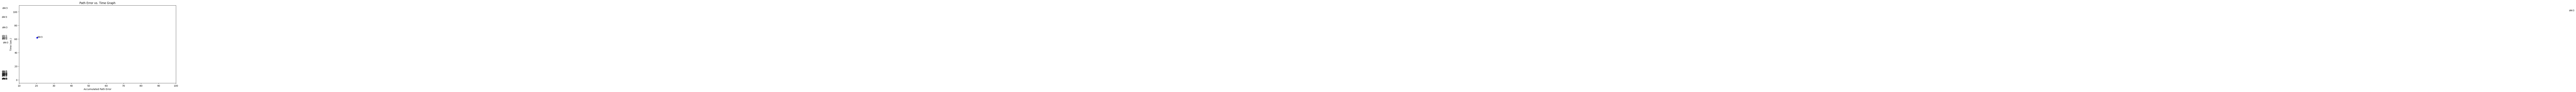

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['green', 'red', 'blue']
for index, row in errors.iterrows():
    ax.scatter(row['acc?error'], row['time'], color = colors[models.index(row['type'])])
    ax.text(row['acc?error'], row['time'], row['identifier'])
ax.set_xlim(10, 100)
ax.set_xlabel('Accumulated Path Error')
ax.set_ylabel("Time (sec.)")
plt.title("Path Error vs. Time Graph")
# plt.legend()
plt.show()

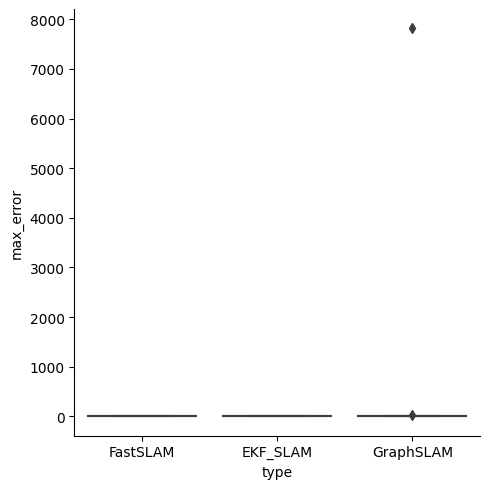

In [86]:
sns.catplot(data=errors, x="type", y="max_error", kind="box")

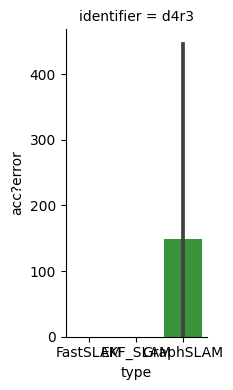

In [87]:
sns.catplot(
    data=errors, x="type", y="acc?error", col="identifier",
    kind="bar", height=4, aspect=.6,
)

#### Analize metrics
**T4.1** Analize the representations, and extract some conclusions regarding the performance of each of SLAM implementation. In case we need to integrate a navigation algorithm based on SLAM to the robots used for recording the datasets, which method would you use? Justify your answer.


(Answer here max 300 words)

**T4.2** Could you list the the three algorithms ordered in terms of robustness? Justify your answer.

(Answer here max 150 words)

### T5. ORB SLAM 3


**T5.1** Which is the difference between VO and VSLAM algorithms?

(Answer here max 150 words)

**T5.2** Which is the difference between direct and indirect SLAM methods?

(Answer here max 150 words)

**T5.3** Which are the main differences between the visual, iisual-inertial, and multimap SLAM methods?

(Answer here max 150 words)

**T5.4** Can you provide a brief description of the four main system components?

(Answer here max 150 words)

**T5.5** Which is the benefit of using an inertial sensor?

(Answer here max 150 words)

**T5.6** Which kinds of environments will work best for ORB SLAM 3?

(Answer here max 150 words)

### Delivery
Download the file in Notebook and Markdown formats to be uploaded in the Aula Digital.

To export the files go to File>Download as>Notebook and File>Download as>Markdown.

Save the files as **E2_name_surname.ipynb** and **E2_name_surname.md**

Compress files and figures in the same directory with the name **E2_name_surname.zip**

**Deadline 2022-11-25**